In [1]:
pip install instaloader pandas matplotlib seaborn

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.3 MB 9.3 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.3 MB 8.4 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.3 MB 8.4 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.3 MB 8.0 MB/s eta 0:00:01
   ---------------------------- ----------- 8.1/11.3 MB 7.9 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.3 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.3 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 7.5 MB/s  0:00:01
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 7.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 7.7 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 7.5 MB/s eta 0:00:01
   ---------------

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset_instagram.csv")
df.head()

,alt,caption,childPosts/0/alt,childPosts/0/caption,childPosts/0/commentsCount,childPosts/0/dimensionsHeight,childPosts/0/dimensionsWidth,childPosts/0/displayUrl,childPosts/0/firstComment,childPosts/0/id,...,taggedUsers/0/is_verified,taggedUsers/0/profile_pic_url,taggedUsers/0/username,timestamp,type,url,videoDuration,videoPlayCount,videoUrl,videoViewCount
0,NaN,Service Kaca Iphone 16 Promax\n\nYuk bisa data...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2025-09-10T09:17:54.000Z,Video,https://www.instagram.com/p/DOapgL_ijEU/,19.533,889.0,https://scontent-msp1-1.cdninstagram.com/o1/v/...,262.0
1,Photo by SERVICE IPHONE | Tangerang | Jakarta ...,𝐏𝐄𝐍𝐆𝐔𝐌𝐔𝐌𝐀𝐍 𝐔𝐍𝐓𝐔𝐊 𝐂𝐎𝐒𝐓𝐔𝐌𝐄𝐑 𝐀𝐁𝐀 𝐑𝐄𝐏𝐀𝐈𝐑\n\n✅ Hany...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2025-06-24T02:40:47.000Z,Image,https://www.instagram.com/p/DLRGJDJPLmk/,NaN,NaN,NaN,NaN
2,Photo by SERVICE IPHONE | Tangerang | Jakarta ...,Waaah Ada Promo Spesial\nYuk Kunjungi website ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2025-07-25T00:52:19.000Z,Image,https://www.instagram.com/p/DMguXr4B7ot/,NaN,NaN,NaN,NaN
3,Photo by SERVICE IPHONE | Tangerang | Jakarta ...,Layar HP anda Retak?\nPerbaikan Atau Ganti LCD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2025-08-09T00:32:30.000Z,Image,https://www.instagram.com/p/DNHUBvJSLuq/,NaN,NaN,NaN,NaN
4,Photo by SERVICE IPHONE | Tangerang | Jakarta ...,Alasan Untuk Kamu Service Di ABA REPAIR.\n\n✅ ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2025-04-05T06:33:52.000Z,Image,https://www.instagram.com/p/DIDhOPJvxdr/,NaN,NaN,NaN,NaN


In [4]:
df_clean = df[['timestamp', 'likesCount', 'commentsCount', 'type', 'caption']].dropna()

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['year'] = df['timestamp'].dt.year
df = df[df['year'].between(2019, 2024)]
df.groupby('year')[['likesCount', 'commentsCount']].sum()

,likesCount,commentsCount
year,,
2021,420,34
2022,377,166
2023,1371,4762
2024,376,2606


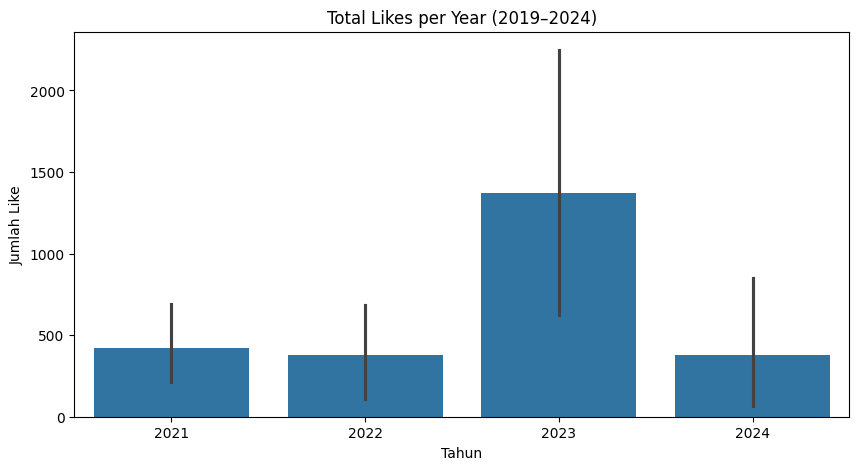

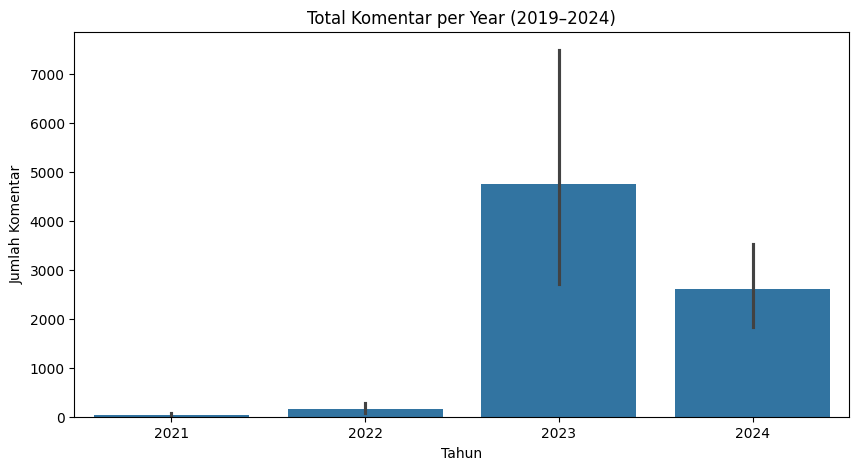

In [6]:
plt.figure(figsize=(10,5))
sns.barplot(x='year', y='likesCount', data=df, estimator=sum)
plt.title('Total Likes per Year (2019–2024)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Like')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='year', y='commentsCount', data=df, estimator=sum)
plt.title('Total Komentar per Year (2019–2024)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Komentar')
plt.show()

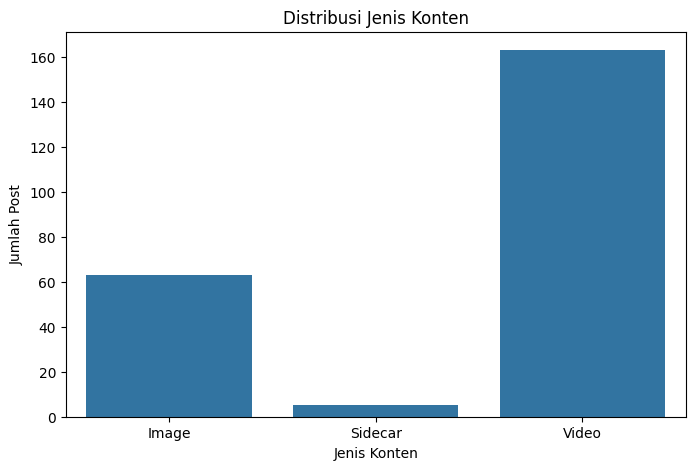

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df)
plt.title('Distribusi Jenis Konten')
plt.xlabel('Jenis Konten')
plt.ylabel('Jumlah Post')
plt.show()

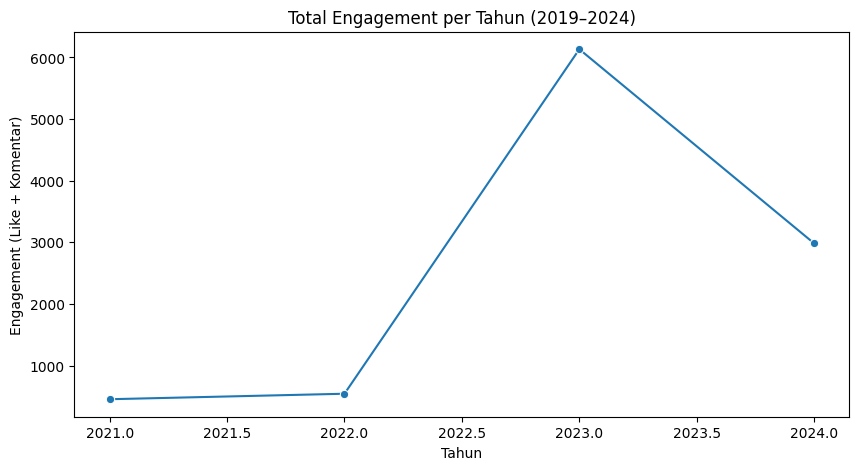

In [8]:
df['engagement'] = df['likesCount'] + df['commentsCount']
eng_by_year = df.groupby('year')['engagement'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='engagement', data=eng_by_year, marker='o')
plt.title('Total Engagement per Tahun (2019–2024)')
plt.xlabel('Tahun')
plt.ylabel('Engagement (Like + Komentar)')
plt.show()

In [14]:
df_followers = pd.read_csv("followers_trend.csv")

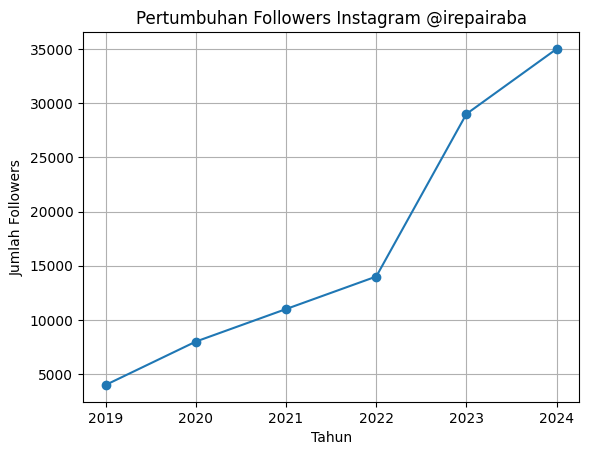

In [15]:
import matplotlib.pyplot as plt

plt.plot(df_followers['Year'], df_followers['Followers'], marker='o')
plt.title('Pertumbuhan Followers Instagram @irepairaba')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Followers')
plt.grid(True)
plt.show()